In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "D:/Data_Science/crime-brasil"
dataset_url = 'https://www.kaggle.com/vianags/crimes-no-brasil-por-estado'
!kaggle datasets download -d vianags/crimes-no-brasil-por-estado -p data


  0%|          | 0.00/104k [00:00<?, ?B/s]
100%|██████████| 104k/104k [00:00<00:00, 254kB/s]
100%|██████████| 104k/104k [00:00<00:00, 252kB/s]


In [14]:
import zipfile

with zipfile.ZipFile('data/crimes-no-brasil-por-estado.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

In [ ]:
!pip install pandas

In [17]:
import pandas as pd

df = pd.read_csv('./data/Crimes_brasil_uf.csv')
df.head()

,Uf,Tipo_crime,Ocorrencias,Data
0,Acre,Estupro,31,2022-01-01
1,Acre,Furto de veículo,50,2022-01-01
2,Acre,Homicídio doloso,10,2022-01-01
3,Acre,Lesão corporal seguida de morte,1,2022-01-01
4,Acre,Roubo a instituição financeira,0,2022-01-01


In [18]:
df.shape

(22338, 4)

In [20]:
df.Uf.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [21]:
df_pe = df.loc[df.Uf == 'Pernambuco', :]
df_pe.head()

,Uf,Tipo_crime,Ocorrencias,Data
1248,Pernambuco,Estupro,146,2022-01-01
1249,Pernambuco,Furto de veículo,496,2022-01-01
1250,Pernambuco,Homicídio doloso,285,2022-01-01
1251,Pernambuco,Lesão corporal seguida de morte,1,2022-01-01
1252,Pernambuco,Roubo a instituição financeira,0,2022-01-01


In [22]:
df_pe.Data.unique()

array(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
       '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
       '2019-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
       '2018-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-

In [23]:
df_pe.Tipo_crime.unique()

array(['Estupro', 'Furto de veículo', 'Homicídio doloso',
       'Lesão corporal seguida de morte',
       'Roubo a instituição financeira', 'Roubo de carga',
       'Roubo de veículo', 'Roubo seguido de morte (latrocínio)',
       'Tentativa de homicídio'], dtype=object)

In [ ]:
!pip install matplotlib

C:\Users\Leonardo Domingos\AppData\Local\Temp\ipykernel_18656\1791436970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['Data'] = pd.to_datetime(_df['Data'] )


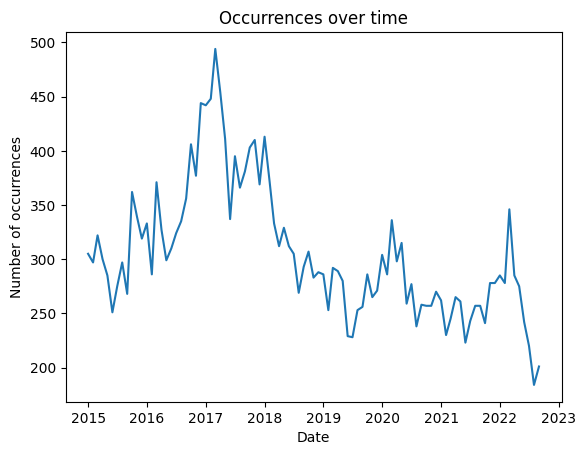

In [30]:
import matplotlib.pyplot as plt

categoria = 'Homicídio doloso'

_df = df_pe.loc[df_pe.Tipo_crime == categoria]
_df['Data'] = pd.to_datetime(_df['Data'] )
_df = _df.sort_values('Data')

plt.plot(_df['Data'], _df['Ocorrencias'])
plt.xlabel('Date')
plt.ylabel('Number of occurrences')
plt.title('Occurrences over time')
plt.show()

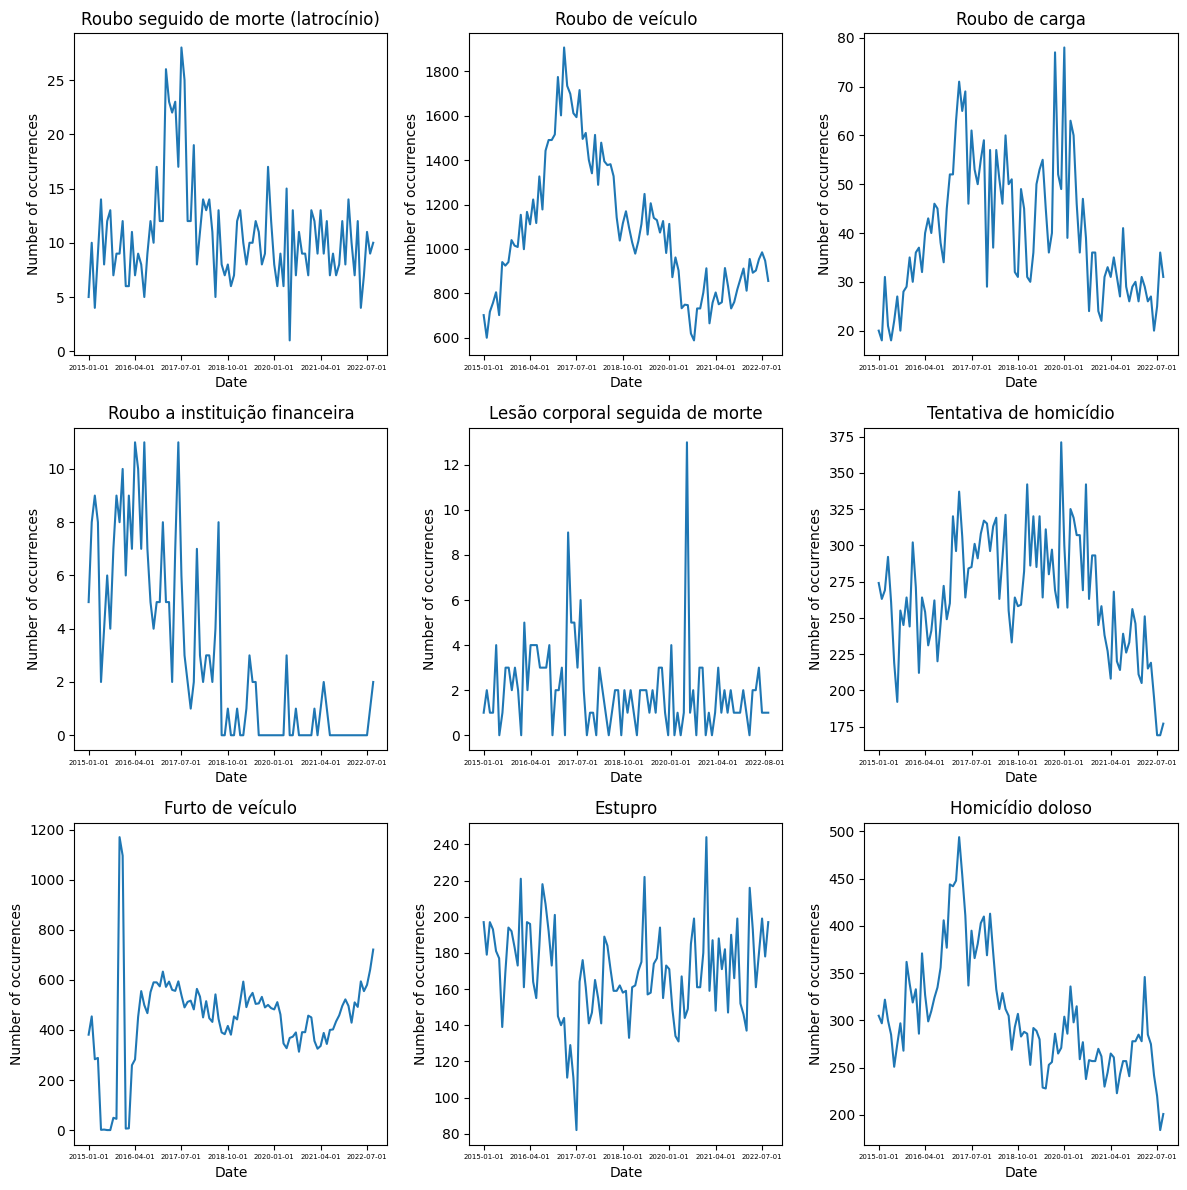

In [46]:
import matplotlib.ticker as ticker
categories = df_pe['Tipo_crime'].unique()
df_pe = df_pe.sort_values('Data')
# set up plot grid
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# loop over categories and create plot for each one
for i, cat in enumerate(categories):
    row = i // 3
    col = i % 3
    subset = df_pe.loc[df_pe['Tipo_crime'] == cat]
    axs[row, col].plot(subset['Data'], subset['Ocorrencias'])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Number of occurrences')
    axs[row, col].set_title(f'{cat}')
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    axs[row, col].tick_params(axis='x', labelsize=5)

plt.tight_layout()
plt.show()

In [43]:
fig.savefig('data/distribution_pe.png', dpi=1200)